In [36]:
from bs4 import BeautifulSoup
import networkx as nx
from networkx.algorithms import approximation
import matplotlib.pyplot as plt
import geopy.distance
import numpy as np
import json 
import pandas as pd

## Парсинг

In [2]:
countries = []
with open("countries.html", "r", encoding='utf-8') as f:
    
    contents = f.read()
 
    soup = BeautifulSoup(contents, 'lxml')
    
    for tr in soup.tbody.findAll("tr"):
        countries.append(tr.td.contents[2].text)
print(countries)

['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'North Macedonia', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City']


In [3]:
borders = dict()
with open("borders.html", "r", encoding='utf-8') as f:
    
    contents = f.read()
 
    soup = BeautifulSoup(contents, 'lxml')
    
    for tr in soup.tbody.findAll("tr"):
        l = []
        for a in tr.findAll("a"):
            if a.has_attr("title"):
                l.append(a.text)
#         print(l[0])
        if l[0] in countries:
            borders[l[0]] = []
            for i in l[1:]:
                if i in countries:
                    borders[l[0]].append(i)
borders['United Kingdom'].remove('Cyprus')
borders['United Kingdom'].remove('Spain')
borders['Cyprus'].remove('United Kingdom')

print(len(borders))

47


In [23]:
capitals_coordinates = dict()
for i in json.load(open('country-capitals.json')):
    if i['CountryName'] in countries:
        capitals_coordinates[i['CountryName']] = (i['CapitalLatitude'], i['CapitalLongitude'])
    if i['CountryName'] == 'Macedonia':
        capitals_coordinates['North Macedonia'] = (i['CapitalLatitude'], i['CapitalLongitude'])

## Создание графа

In [5]:
g = nx.Graph()
for country, neighbors in borders.items():
    g.add_node(country)
    for neighbor in neighbors:
        g.add_edge(country, neighbor)

In [28]:
for i in nx.connected_components(g):
    print(i)

{'Estonia', 'Germany', 'Netherlands', 'Slovenia', 'Ukraine', 'Spain', 'Liechtenstein', 'Monaco', 'Greece', 'Croatia', 'Czech Republic', 'Finland', 'Denmark', 'Albania', 'Turkey', 'Sweden', 'Luxembourg', 'Lithuania', 'Kosovo', 'Italy', 'Montenegro', 'Moldova', 'Belgium', 'Switzerland', 'Latvia', 'Slovakia', 'Portugal', 'Romania', 'Poland', 'Vatican City', 'North Macedonia', 'Bosnia and Herzegovina', 'Austria', 'Bulgaria', 'Norway', 'Hungary', 'France', 'San Marino', 'Serbia', 'Belarus', 'Russia', 'Andorra'}
{'Cyprus'}
{'Iceland'}
{'Ireland', 'United Kingdom'}
{'Malta'}


In [6]:
G = g.subgraph(sorted(nx.connected_components(g), key=len, reverse=True)[0])

In [7]:
wg = nx.Graph()
for country, neighbors in borders.items():
    wg.add_node(country)
    for neighbor in neighbors:
        wg.add_edge(country, neighbor, weight = geopy.distance.distance(capitals_coordinates[country], capitals_coordinates[neighbor]).km)

In [8]:
WG = wg.subgraph(sorted(nx.connected_components(g), key=len, reverse=True)[0])

### Задания

#### (a) Prove that G is planar by drawing it on a plane without an intersection of edges.

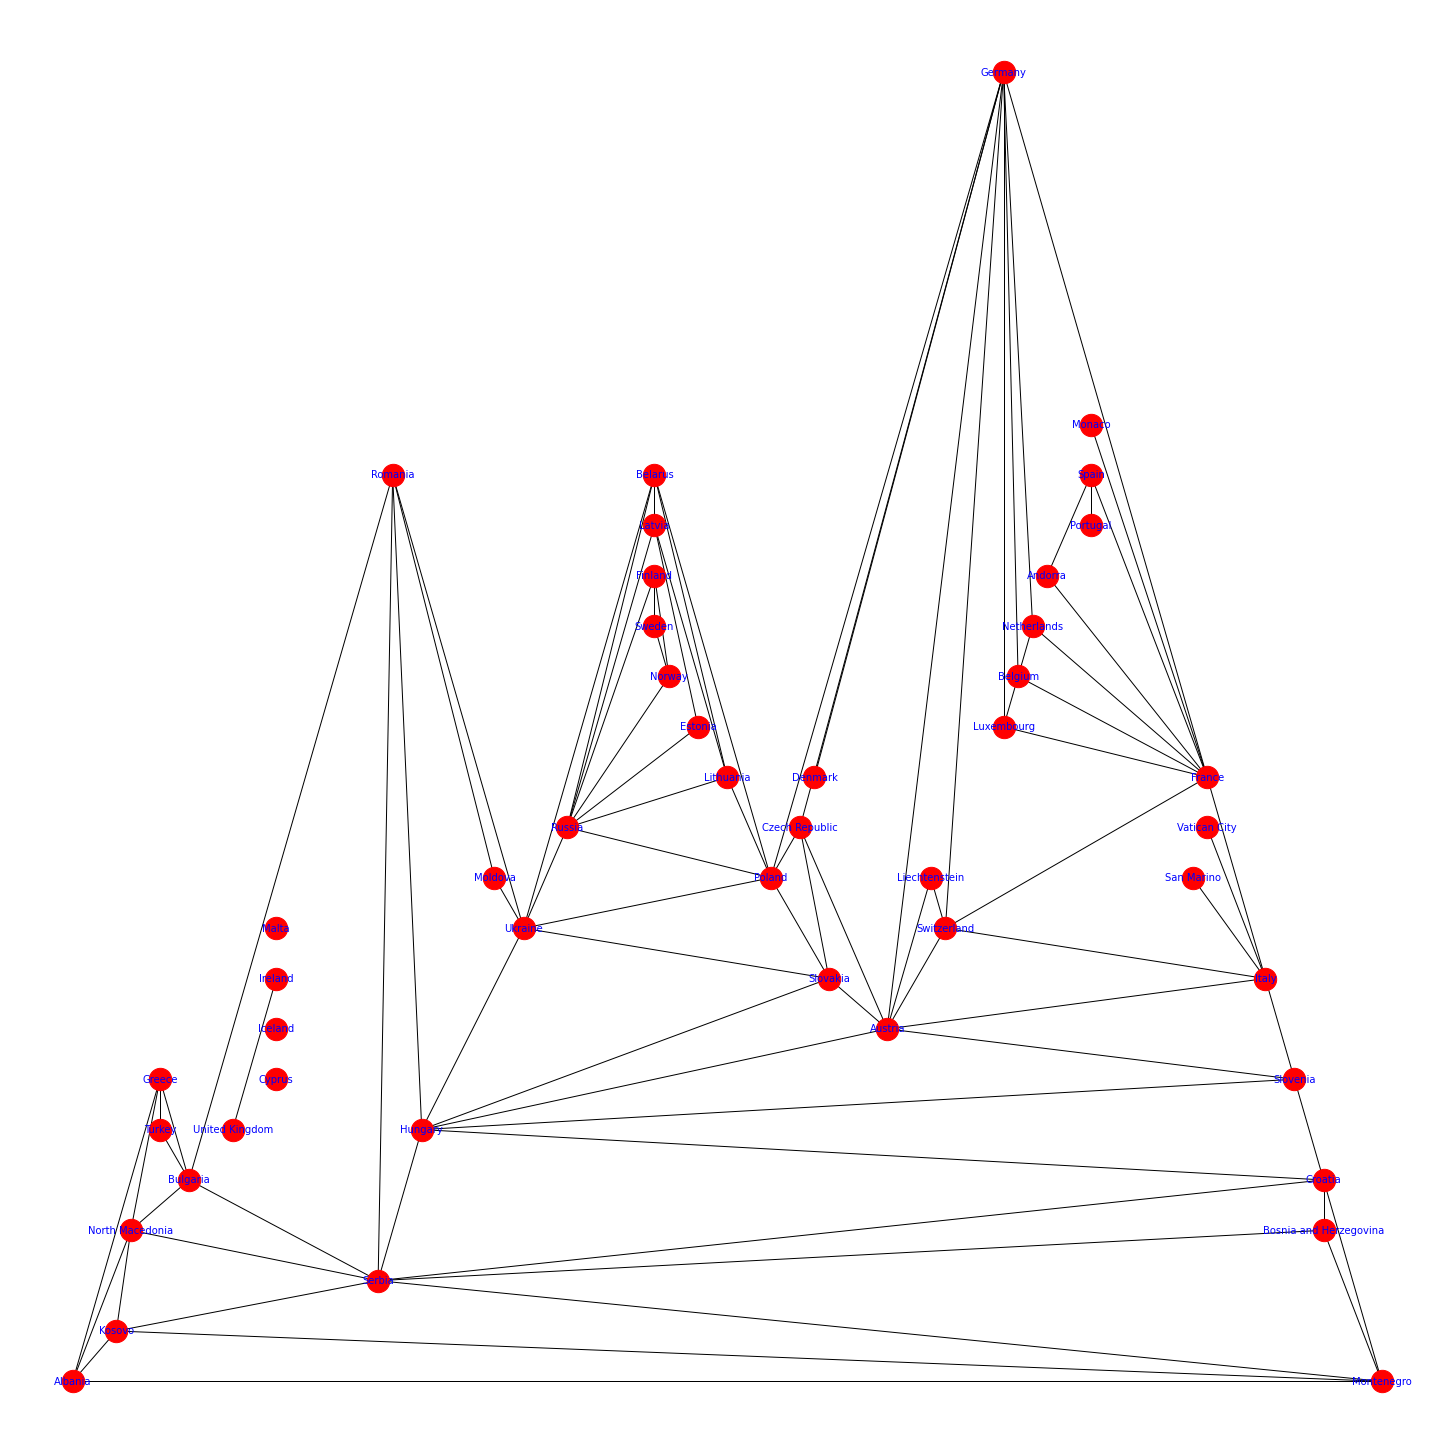

In [276]:
plt.figure(figsize=(20, 20))
nx.draw(g, nx.planar_layout(g), with_labels=True, node_size=500, font_size = 10, font_color='blue', node_color='red')
plt.savefig("output/a.png")

#### (b) Find |V|, |E|, δ(G), Δ(G), rad(G), diam(G), girth(G), center(G), κ(G), λ(G).

|V|, |E|

In [35]:
print(len(g.nodes()),
      len(g.edges()))

47 89


δ(G), Δ(G)

In [36]:
print(
    min(G.degree, key=lambda item:item[1])[1],
    max(G.degree, key=lambda item:item[1])[1])

1 9


rad(G), diam(G)

In [37]:
print(
    nx.radius(G),
    nx.diameter(G)
)

5 8


girth(G)

In [11]:
len(nx.minimum_cycle_basis(G)[0])

3

center(G)

In [39]:
nx.center(G)

['Austria',
 'Czech Republic',
 'Germany',
 'Hungary',
 'Slovakia',
 'Slovenia',
 'Switzerland',
 'Belarus',
 'Poland',
 'Russia',
 'Ukraine',
 'Croatia']

κ(G), λ(G)

In [12]:
print(
    nx.connectivity.node_connectivity(G),
    nx.connectivity.edge_connectivity(G),
    )

1 1


(c) Find the minimum vertex coloring Z : V → N of G.

In [69]:
def get_color(x):
    colors = ['red', 
              'green', 
              'blue', 
              'yellow', 
              'orange', 
              'purple',
              'olive',
              'brown',
              'black']
    return colors[x]

In [73]:
vertex_color = nx.coloring.greedy_color(G)

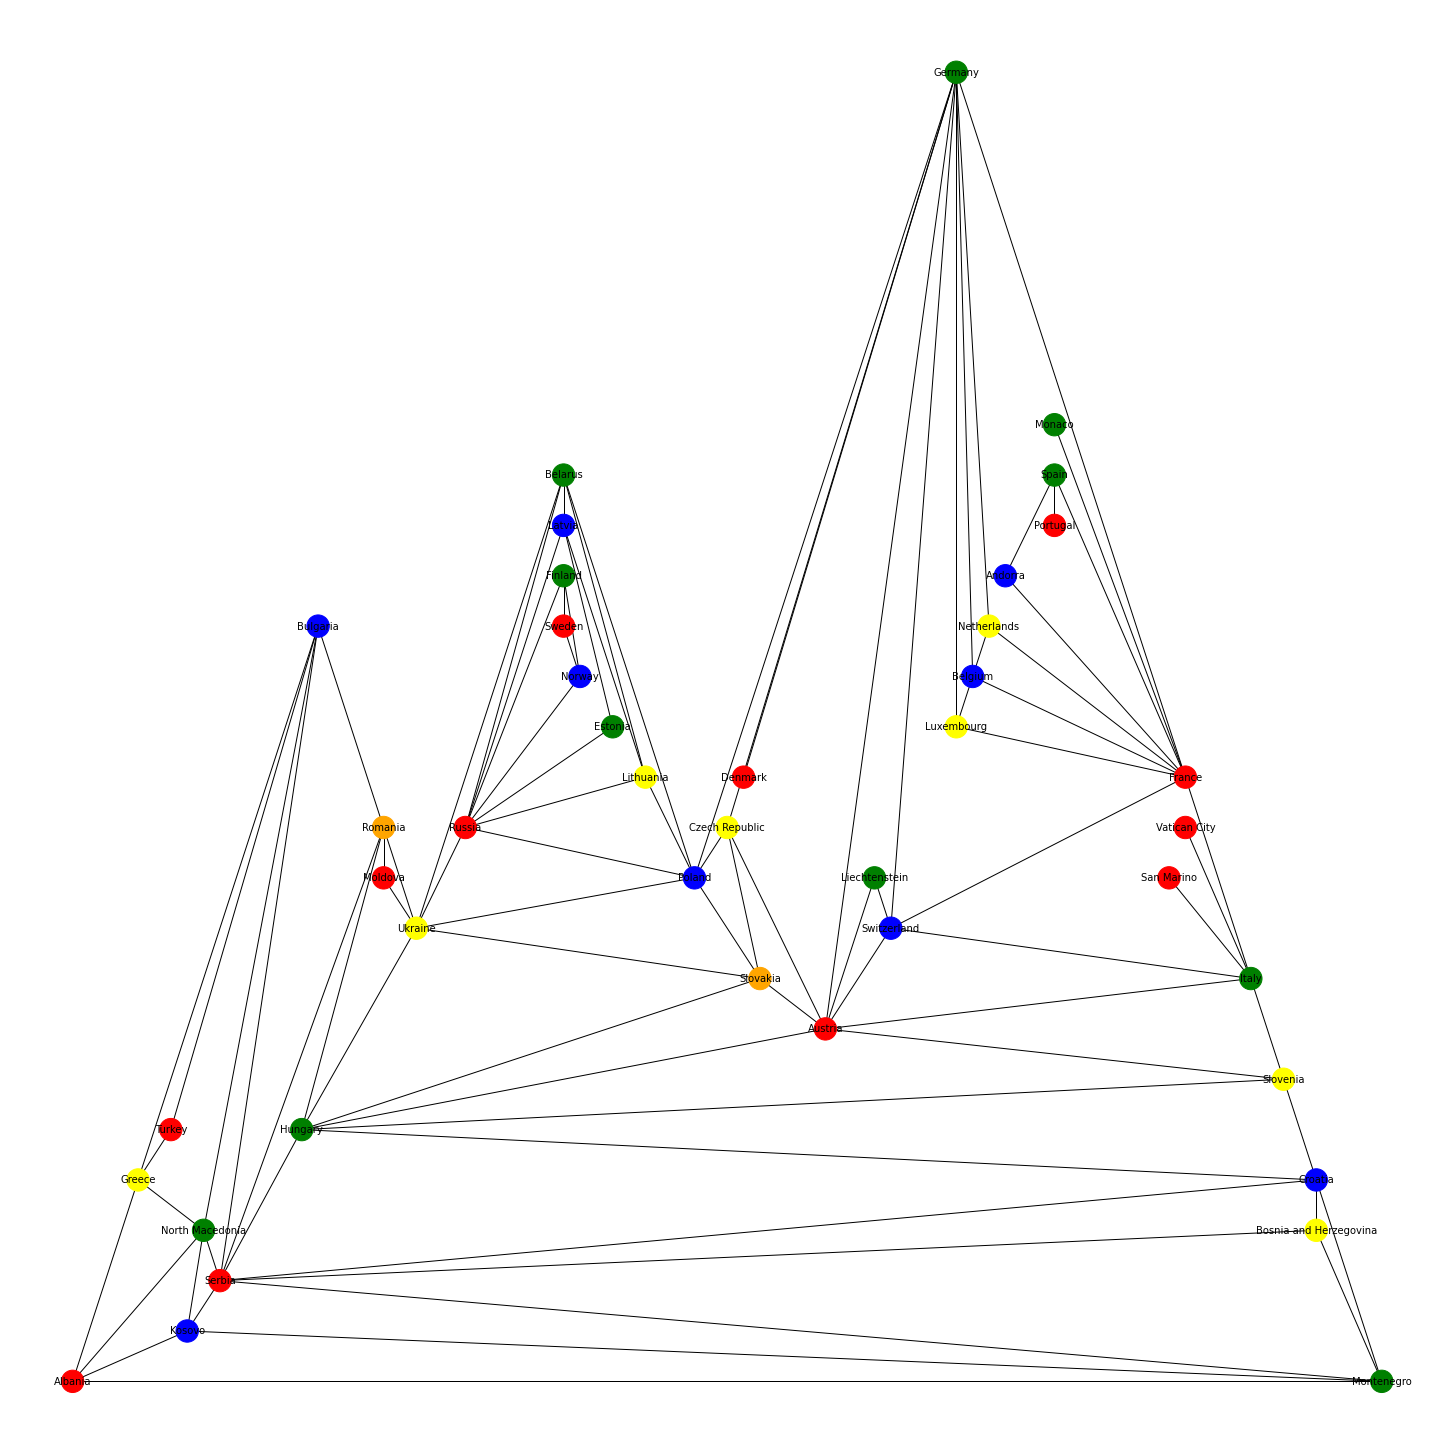

In [74]:
plt.figure(figsize=(20, 20))
nx.draw(G, nx.planar_layout(G), with_labels=True, node_size=500, font_size = 10, font_color='black', node_color=[get_color(vertex_color[i]) for i in G.nodes()])
plt.savefig('output/c.png')

(d) Find the minimum edge coloring X : E → N of G.

По теор. Визинга т.к. граф планарный и Δ(G) >= 8, то хромотический индекс = Δ(G) = 9

In [44]:
edges = list(G.edges())
e = nx.Graph()
for i in range(len(edges)):
    for j in range(len(edges)):
        if i == j:
            continue
        if edges[i][0]== edges[j][0] or edges[i][1] == edges[j][0] or edges[i][0] == edges[j][1] or edges[i][1] == edges[j][1]:
            e.add_edge(i, j)

In [49]:
edges_color = nx.coloring.greedy_color(e)

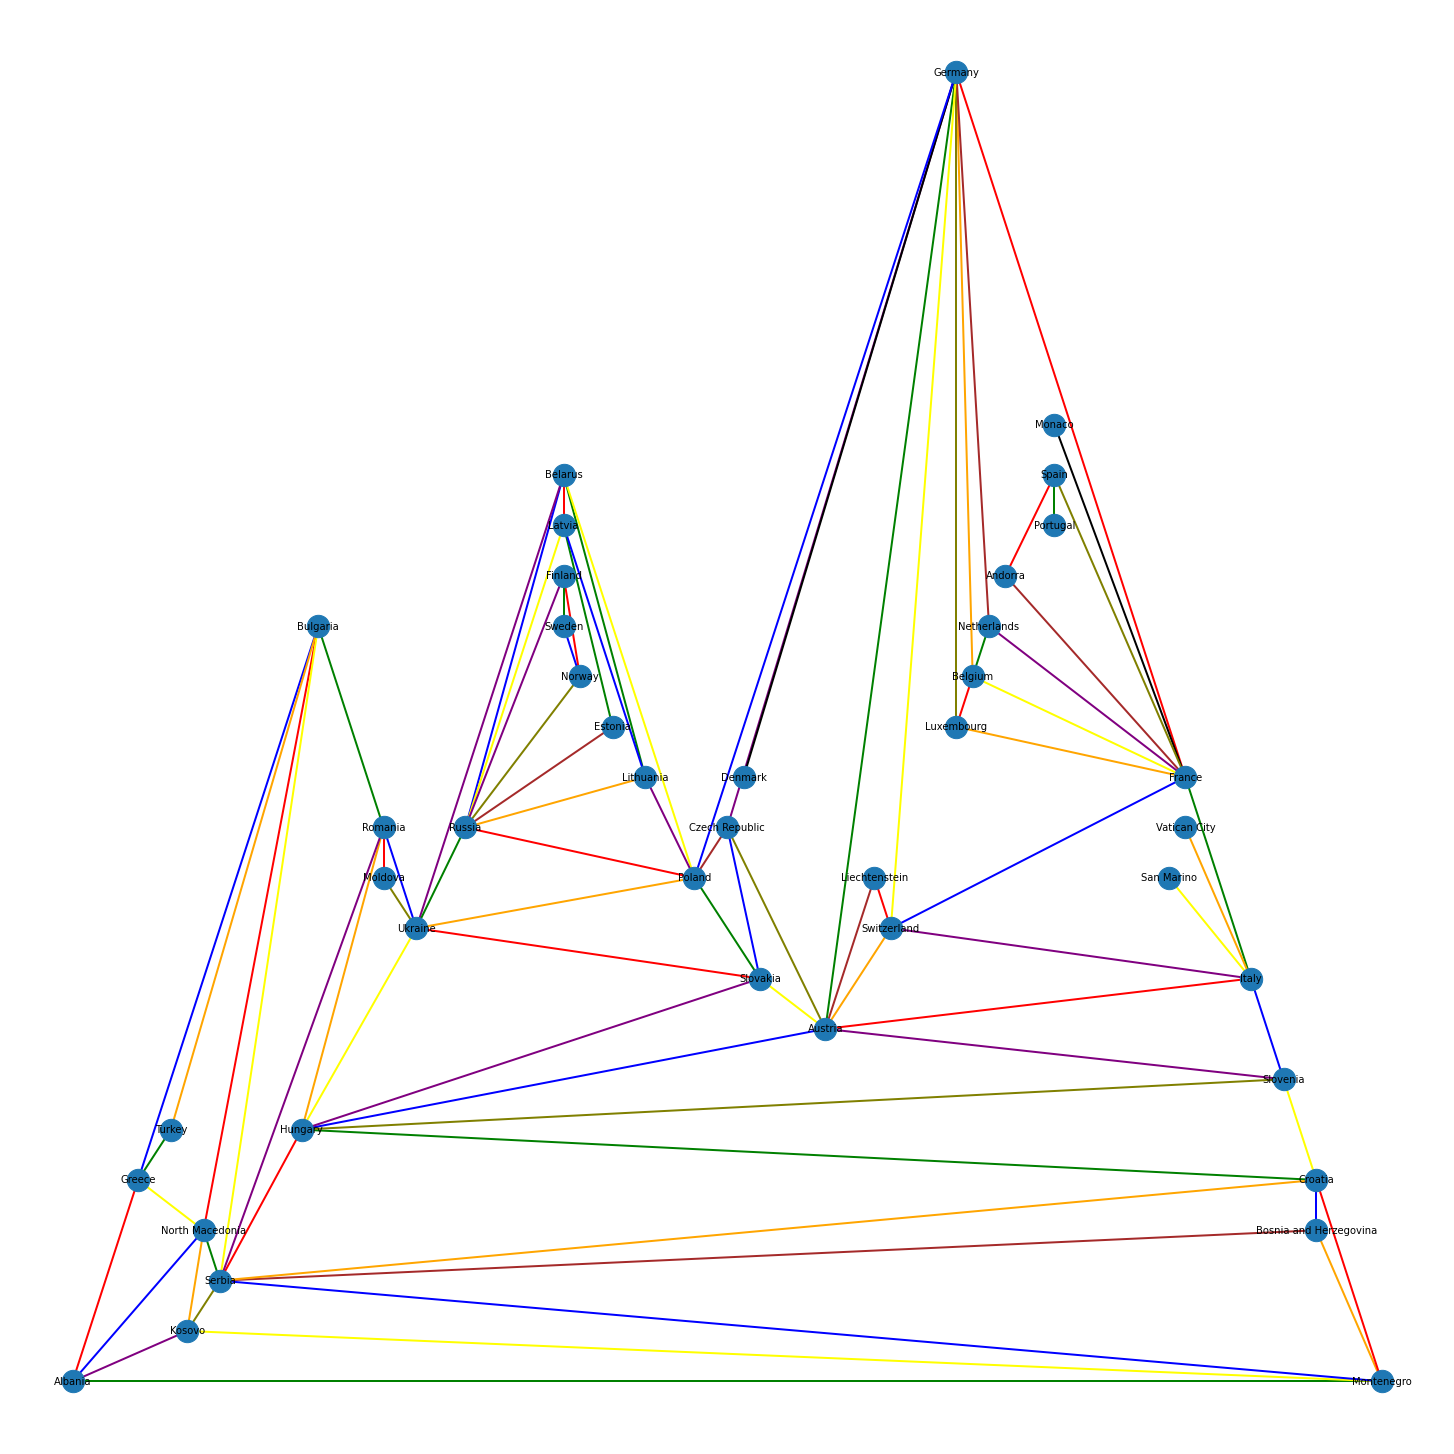

In [157]:
plt.figure(figsize=(20, 20))
nx.draw(G, nx.planar_layout(G), with_labels=True, node_size=500, font_size = 10, font_color='black', edge_color=[get_color(edges_color[edges.index(i)]) for i in edges], width=2)
plt.savefig('output/d.png')

(e) Find the maximum clique Q ⊆ V of G.

In [41]:
len_max_clique = len(max(nx.find_cliques(G), key=lambda item: len(item)))
[i for i in nx.find_cliques(G) if len(i) == len_max_clique] 

[['Latvia', 'Russia', 'Belarus', 'Lithuania'],
 ['Lithuania', 'Belarus', 'Russia', 'Poland'],
 ['Bosnia and Herzegovina', 'Montenegro', 'Serbia', 'Croatia'],
 ['Belarus', 'Russia', 'Ukraine', 'Poland'],
 ['Germany', 'France', 'Belgium', 'Netherlands'],
 ['Germany', 'France', 'Belgium', 'Luxembourg']]

(f) Find the maximum stable set S ⊆ V of G.

In [42]:
approximation.maximum_independent_set(G)

{'Albania',
 'Andorra',
 'Austria',
 'Belarus',
 'Belgium',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Denmark',
 'Estonia',
 'Finland',
 'Moldova',
 'Monaco',
 'Portugal',
 'San Marino',
 'Vatican City'}

(g) Find the maximum matching M ⊆ E of G.

In [55]:
nx.algorithms.max_weight_matching(G, maxcardinality=True)

{('Albania', 'North Macedonia'),
 ('Austria', 'Czech Republic'),
 ('Belgium', 'Netherlands'),
 ('Denmark', 'Germany'),
 ('Estonia', 'Latvia'),
 ('Finland', 'Sweden'),
 ('France', 'Monaco'),
 ('Hungary', 'Slovakia'),
 ('Italy', 'Vatican City'),
 ('Liechtenstein', 'Switzerland'),
 ('Lithuania', 'Poland'),
 ('Moldova', 'Romania'),
 ('Montenegro', 'Bosnia and Herzegovina'),
 ('Norway', 'Russia'),
 ('Serbia', 'Kosovo'),
 ('Slovenia', 'Croatia'),
 ('Spain', 'Portugal'),
 ('Turkey', 'Bulgaria'),
 ('Ukraine', 'Belarus')}

(h) Find the minimum vertex cover R ⊆ V of G.

In [106]:
approximation.min_weighted_vertex_cover(G)

{'Albania',
 'Andorra',
 'Austria',
 'Belarus',
 'Belgium',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Croatia',
 'Czech Republic',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Italy',
 'Kosovo',
 'Latvia',
 'Liechtenstein',
 'Lithuania',
 'Moldova',
 'Montenegro',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Russia',
 'San Marino',
 'Serbia',
 'Slovakia',
 'Spain',
 'Switzerland',
 'Ukraine'}

(i) Find the minimum edge cover F ⊆ E of G.

In [107]:
nx.min_edge_cover(G)

{('Andorra', 'France'),
 ('Bulgaria', 'Turkey'),
 ('Croatia', 'Montenegro'),
 ('Denmark', 'Germany'),
 ('Estonia', 'Latvia'),
 ('Finland', 'Sweden'),
 ('France', 'Monaco'),
 ('Germany', 'Denmark'),
 ('Germany', 'Luxembourg'),
 ('Greece', 'North Macedonia'),
 ('Italy', 'San Marino'),
 ('Italy', 'Vatican City'),
 ('Kosovo', 'Albania'),
 ('Liechtenstein', 'Austria'),
 ('Lithuania', 'Belarus'),
 ('Moldova', 'Romania'),
 ('Monaco', 'France'),
 ('Netherlands', 'Belgium'),
 ('Norway', 'Russia'),
 ('Poland', 'Czech Republic'),
 ('San Marino', 'Italy'),
 ('Serbia', 'Bosnia and Herzegovina'),
 ('Slovakia', 'Ukraine'),
 ('Slovenia', 'Hungary'),
 ('Spain', 'Portugal'),
 ('Switzerland', 'Italy'),
 ('Vatican City', 'Italy')}

(j) Find the shortest closed path (circuit) W that visits every vertex of G.

(k) Find the shortest closed path (circuit) U that visits every edge of G.

In [34]:
print([u for u, v in nx.eulerian_circuit(nx.eulerize(G))])

['Albania', 'Montenegro', 'Serbia', 'Romania', 'Moldova', 'Ukraine', 'Russia', 'Norway', 'Sweden', 'Finland', 'Norway', 'Finland', 'Russia', 'Poland', 'Ukraine', 'Belarus', 'Poland', 'Lithuania', 'Russia', 'Latvia', 'Lithuania', 'Belarus', 'Russia', 'Estonia', 'Latvia', 'Belarus', 'Poland', 'Slovakia', 'Ukraine', 'Romania', 'Bulgaria', 'Serbia', 'Croatia', 'Bosnia and Herzegovina', 'Serbia', 'North Macedonia', 'Bulgaria', 'Turkey', 'Greece', 'North Macedonia', 'Kosovo', 'Serbia', 'Hungary', 'Ukraine', 'Romania', 'Hungary', 'Slovakia', 'Czech Republic', 'Poland', 'Germany', 'Netherlands', 'Belgium', 'Luxembourg', 'Germany', 'Denmark', 'Germany', 'Switzerland', 'Italy', 'Vatican City', 'Italy', 'San Marino', 'Italy', 'Slovenia', 'Croatia', 'Hungary', 'Slovenia', 'Austria', 'Slovakia', 'Austria', 'Switzerland', 'Liechtenstein', 'Austria', 'Switzerland', 'France', 'Netherlands', 'France', 'Monaco', 'France', 'Luxembourg', 'France', 'Italy', 'Austria', 'Germany', 'Belgium', 'France', 'Spain

(l) Find all 2-vertex-connected components (blocks) and draw a block-cut tree of g

In [153]:
edge_colors = [''] * len(g.edges())
for edge in g.edges():
    count = 0
    for block in nx.algorithms.components.biconnected_component_edges(g):
        if edge in block or tuple([i for i in reversed(edge)]) in block:
            edge_colors[list(g.edges()).index(edge)] = get_color(count)
        count+=1

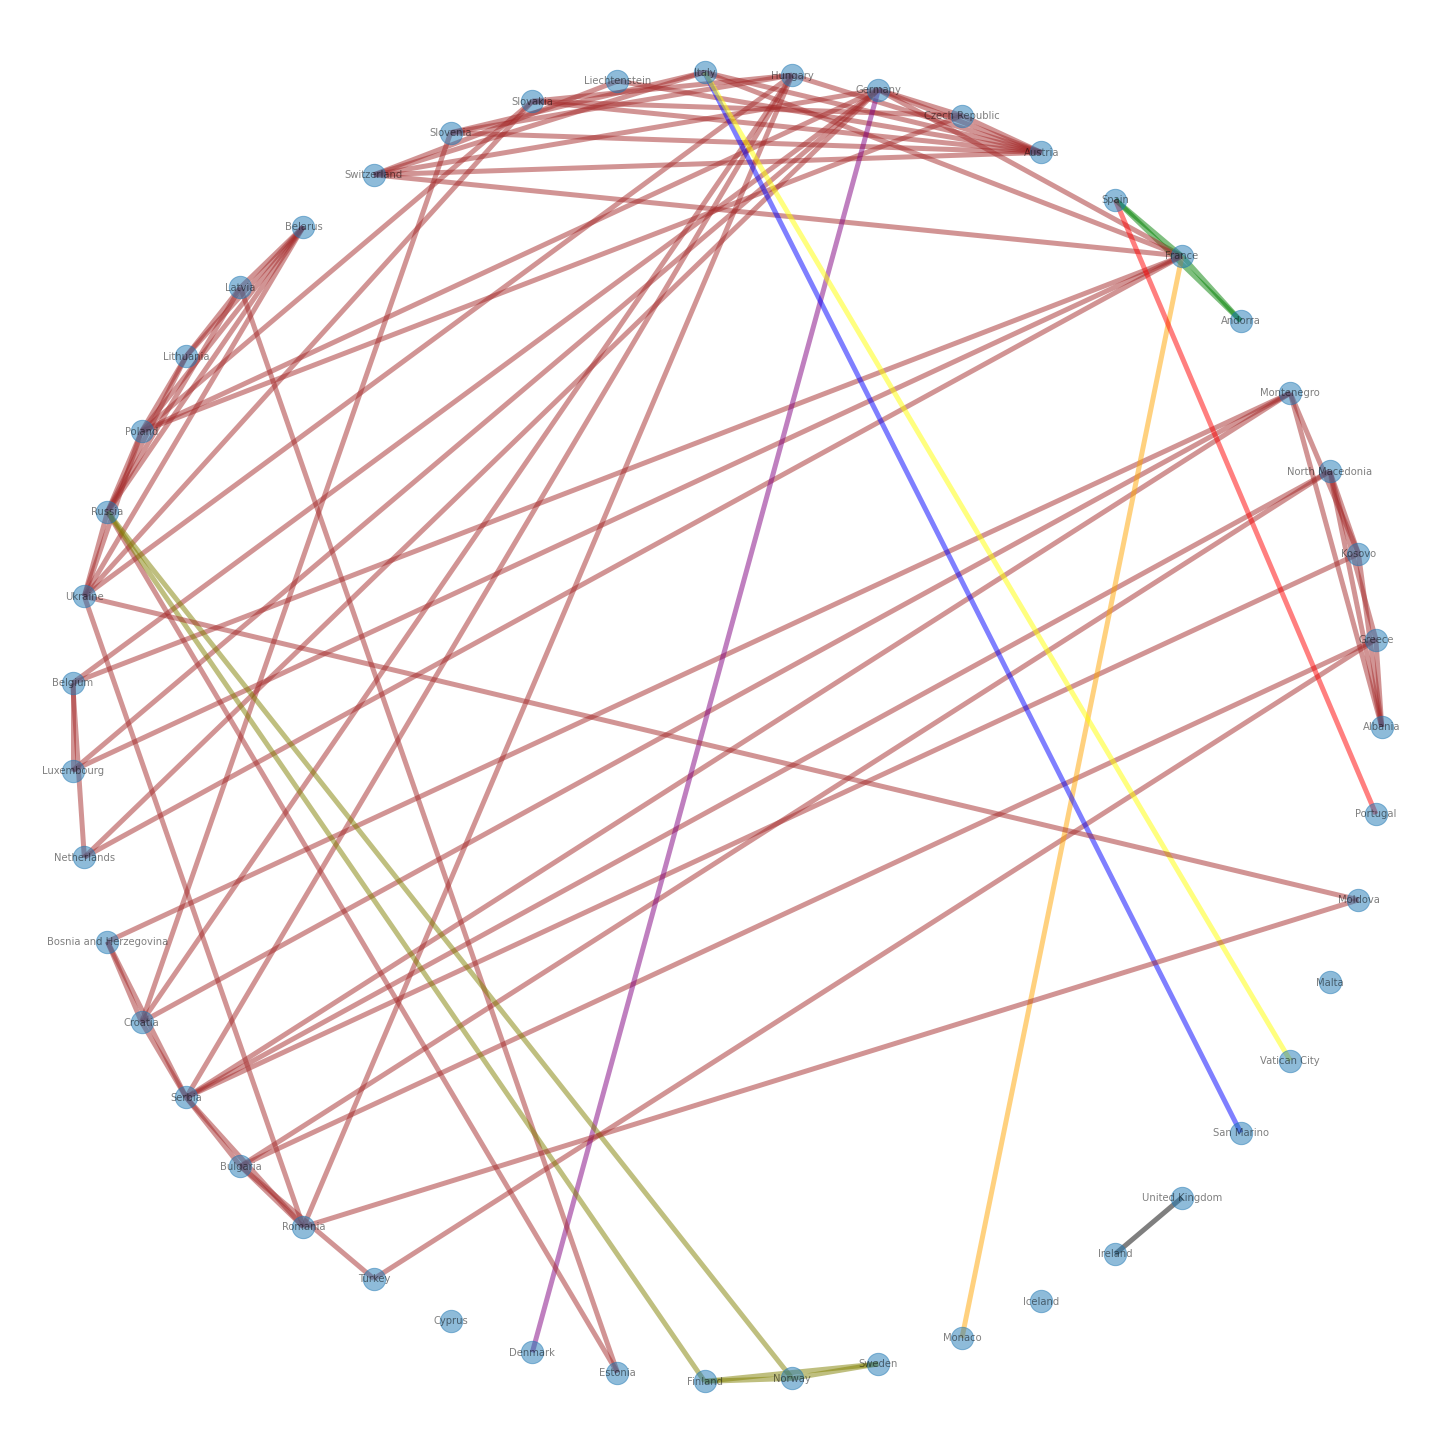

In [187]:
plt.figure(figsize=(20, 20))
nx.draw(g, nx.circular_layout(g), with_labels=True, node_size=500, font_size = 10, font_color='black', edge_color=edge_colors, width=5, alpha=0.5)
plt.savefig('output/l.png')

(m) Find all 2-edge-connected components of g

In [116]:
for i in nx.algorithms.connectivity.edge_kcomponents.bridge_components(g):
    print(i)

{'Bulgaria', 'Poland', 'Moldova', 'Sweden', 'Kosovo', 'Belgium', 'Andorra', 'Liechtenstein', 'France', 'Germany', 'Serbia', 'Bosnia and Herzegovina', 'Hungary', 'Norway', 'Croatia', 'Turkey', 'Belarus', 'Finland', 'Lithuania', 'Luxembourg', 'Russia', 'Austria', 'Albania', 'North Macedonia', 'Romania', 'Latvia', 'Slovakia', 'Spain', 'Italy', 'Czech Republic', 'Netherlands', 'Slovenia', 'Montenegro', 'Switzerland', 'Ukraine', 'Estonia', 'Greece'}
{'Cyprus'}
{'Denmark'}
{'Monaco'}
{'Iceland'}
{'Ireland'}
{'United Kingdom'}
{'San Marino'}
{'Vatican City'}
{'Malta'}
{'Portugal'}


(n) Construct an SPQR tree of the largest biconnected component of G.

(o) Add the weight functionw : E → R denoting the distance between capitals.

Find the minimum(w.r.t. the total weight of edges) spanning tree T for G, w = (V , E,w).

In [18]:
minimum_spanning_tree = 0
for i in nx.minimum_spanning_tree(WG).edges(data=True):
    minimum_spanning_tree += i[2]['weight']
minimum_spanning_tree

13854.023575088535

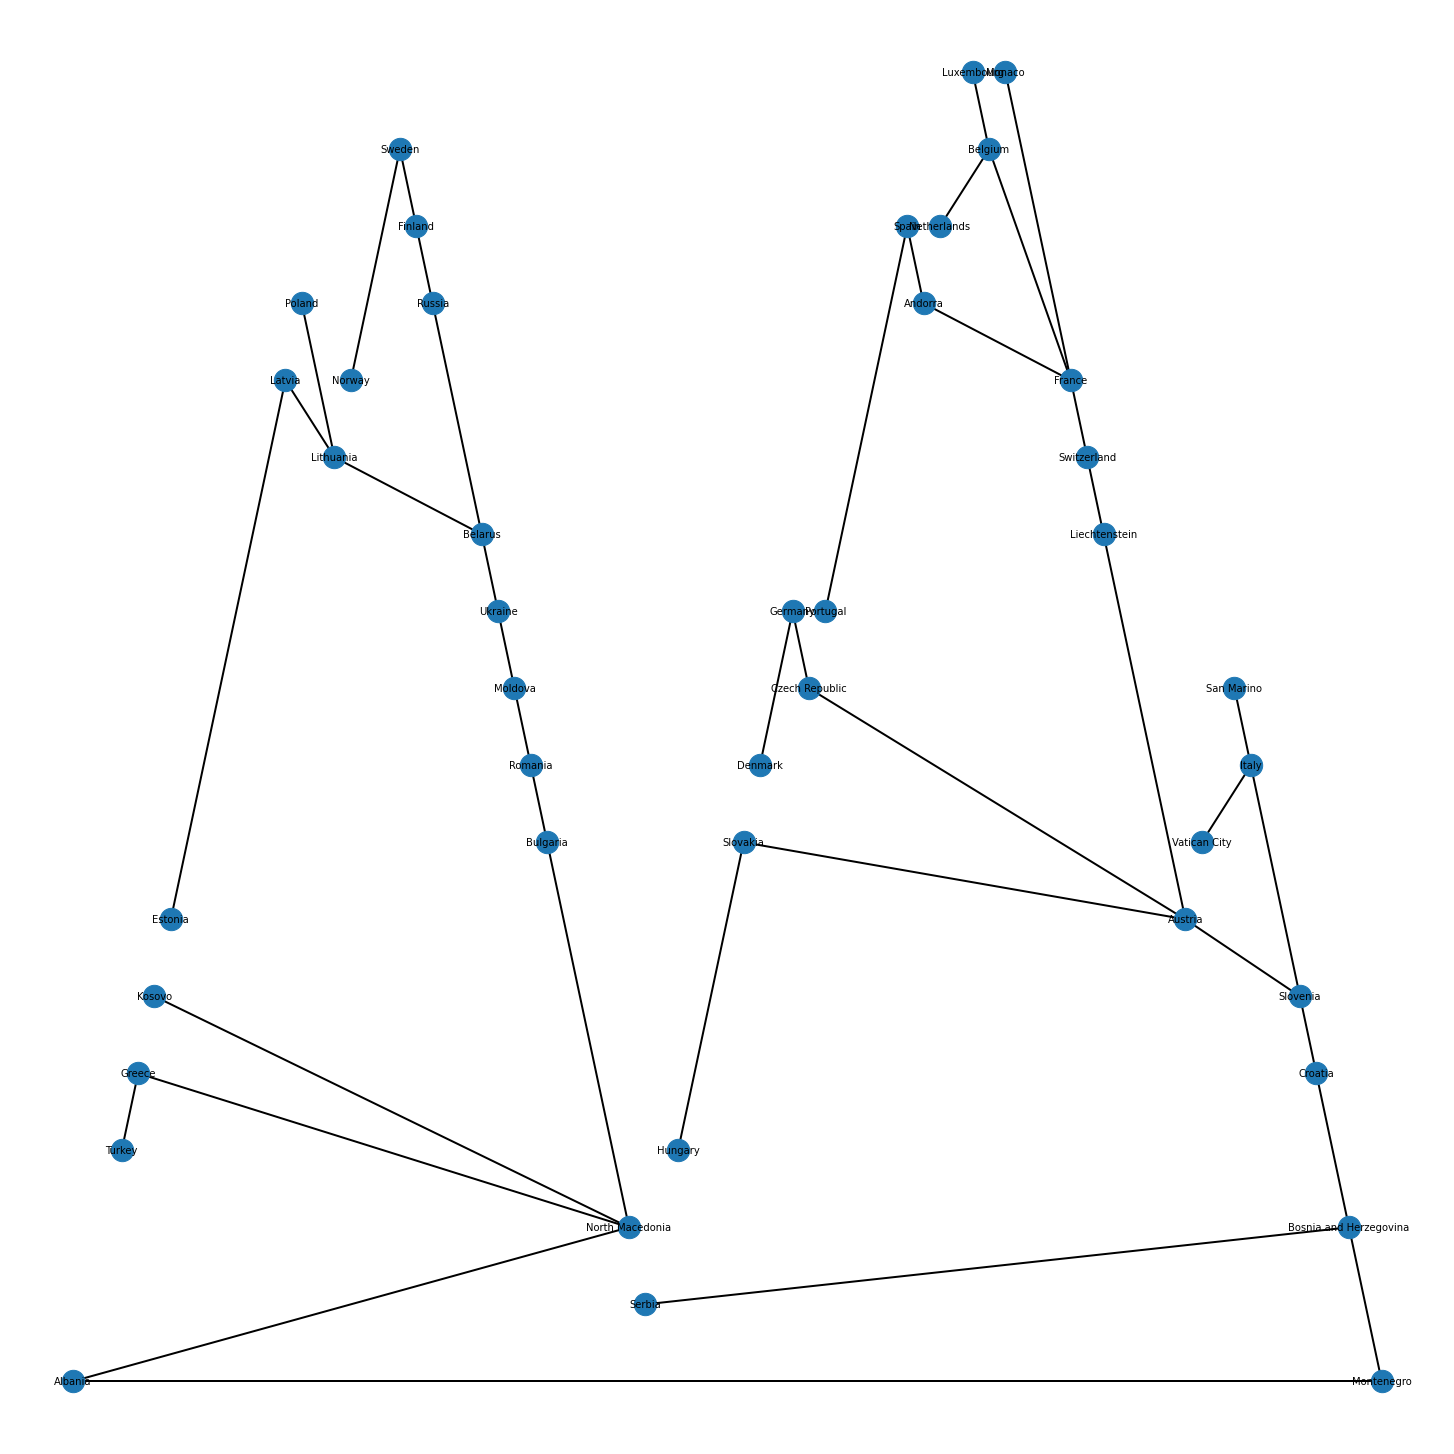

In [16]:
plt.figure(figsize=(20, 20))
nx.draw(nx.minimum_spanning_tree(WG), nx.planar_layout(nx.minimum_spanning_tree(WG)), with_labels=True, node_size=500, font_size = 10, font_color='black', width=2)

(p) Find centroid(T) (w.r.t. the edge weight function w).

In [21]:
nx.barycenter(WG, weight='weight')

['Slovakia']

(q) Construct the Prufer code for  ̈ T .

In [22]:
print(nx.to_prufer_sequence(nx.convert_node_labels_to_integers(nx.minimum_spanning_tree(WG))))

[3, 14, 8, 19, 23, 23, 6, 26, 1, 3, 10, 9, 8, 18, 19, 17, 36, 34, 21, 17, 22, 40, 6, 12, 12, 15, 30, 29, 3, 0, 4, 26, 27, 15, 8, 13, 16, 6, 5, 7]
